In [1]:
import pandas as pd
from math import sin, cos, sqrt, atan2, radians
import numpy as np
import os
import time
import gc
import geopandas as gpd
from geolib import geohash
import matplotlib.pyplot as plt
import matplotlib
from shapely.geometry import Point, Polygon, MultiPolygon
%matplotlib inline

In [2]:
from cartoframes.viz import Map, Layer, basemaps
from cartoframes.viz.helpers import color_continuous_layer, color_bins_layer, utils
from matplotlib import cm
from cartoframes.data import Dataset

In [3]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import mplleaflet
import osmnx as ox
import pysal as ps

/opt/conda/envs/thundergeo/lib/python3.6/site-packages/pysal/explore/segregation/network/network.py:16: UserWarning: You need pandana and urbanaccess to work with segregation's network module
You can install them with  `pip install urbanaccess pandana` or `conda install -c udst pandana urbanaccess`
  "You need pandana and urbanaccess to work with segregation's network module\n"
/opt/conda/envs/thundergeo/lib/python3.6/site-packages/pysal/model/spvcm/abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


In [4]:
city_df = gpd.read_file("king_county_admin_mapfiles/city.shp")
city_of_interest = 'Seattle'
single_city = city_df[city_df['CITYNAME']==city_of_interest].copy()
single_city.to_crs({'init': 'epsg:4326'}, inplace=True)

In [5]:
seattle_geohash = gpd.read_file("seattle_geohash_boxes_level6.geojson")

In [6]:
@interact(index_of_interest=range(seattle_geohash.index.min(), seattle_geohash.index.max()))
def show_geohash_group_by_year(index_of_interest=1,weights=['Rook','Queen','KNN','DistanceBand']):
    fig, ax = plt.subplots(figsize=(5,7))
    
    if weights == 'Rook':
        seattle_geohash_w = ps.lib.weights.Rook.from_dataframe(seattle_geohash)
    elif weights == 'Queen':
        seattle_geohash_w = ps.lib.weights.Queen.from_dataframe(seattle_geohash)
    elif weights == 'KNN':
        seattle_geohash_w = ps.lib.weights.KNN.from_dataframe(seattle_geohash, k=8)
    elif weights == 'DistanceBand':
        seattle_geohash_w = ps.lib.weights.DistanceBand.from_dataframe(seattle_geohash,threshold=0.025)

    index_geohash = seattle_geohash.loc[index_of_interest:index_of_interest].copy()
    neighbor_geohash = seattle_geohash.loc[(seattle_geohash_w.neighbors[index_of_interest])].copy()

    single_city.plot(color='none', 
                       edgecolor='black', 
                      ax=ax)

    neighbor_geohash.plot(color='none', 
                       edgecolor='black', 
                      ax=ax)

    index_geohash.plot(color='blue',
                      ax=ax)

interactive(children=(Dropdown(description='index_of_interest', index=1, options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9…

In [7]:
@interact(index_of_interest=range(seattle_geohash.index.min(), seattle_geohash.index.max()))
def show_geohash_group_by_year(index_of_interest=1,weights=['Rook','Queen','KNN','DistanceBand']):
   
    if weights == 'Rook':
        seattle_geohash_w = ps.lib.weights.Rook.from_dataframe(seattle_geohash)
    elif weights == 'Queen':
        seattle_geohash_w = ps.lib.weights.Queen.from_dataframe(seattle_geohash)
    elif weights == 'KNN':
        seattle_geohash_w = ps.lib.weights.KNN.from_dataframe(seattle_geohash, k=8)
    elif weights == 'DistanceBand':
        seattle_geohash_w = ps.lib.weights.DistanceBand.from_dataframe(seattle_geohash,threshold=0.025)

    index_geohash = seattle_geohash.loc[index_of_interest:index_of_interest].copy()
    neighbor_geohash = seattle_geohash.loc[(seattle_geohash_w.neighbors[index_of_interest])].copy()

    display(Map(
        
        [Layer(single_city,
              'color: transparent'
             ),
         Layer(neighbor_geohash,
              'color: white'
             ),
        Layer(index_geohash,
              'color: blue'
             )]
    ))

interactive(children=(Dropdown(description='index_of_interest', index=1, options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9…

# instead of geohash, try the same by cutting the Seattle polygon into pieces

In [8]:
# make the geometry a multipolygon if it's not already
geometry = single_city['geometry'].iloc[0]
if isinstance(geometry, Polygon):
    geometry = MultiPolygon([geometry])
geometry_cut = ox.quadrat_cut_geometry(geometry, quadrat_width=0.01)
seattle_cut = gpd.GeoDataFrame(crs={'init':'4326'}
                 ,geometry=[geom for geom in geometry_cut.geoms])

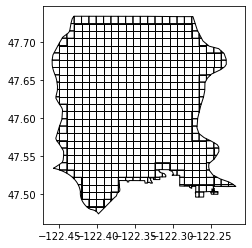

In [9]:
seattle_cut.plot(color='none', 
                       edgecolor='black')

# TO DO - find out why `Rook` and `Queen` neighbors are not registering with the `os.quadrant_cut_geometry` pieces. My guess is that the polygons do not "touch" in the correct way

In [10]:
@interact(index_of_interest=range(seattle_cut.index.min(), seattle_cut.index.max()))
def show_geohash_group_by_year(index_of_interest=1,weights=['Rook','Queen','KNN','DistanceBand']):
    fig, ax = plt.subplots(figsize=(5,7))
    
    if weights == 'Rook':
        seattle_cut_w = ps.lib.weights.Rook.from_dataframe(seattle_cut)
    elif weights == 'Queen':
        seattle_cut_w = ps.lib.weights.Queen.from_dataframe(seattle_cut)
    elif weights == 'KNN':
        seattle_cut_w = ps.lib.weights.KNN.from_dataframe(seattle_cut, k=8)
    elif weights == 'DistanceBand':
        seattle_cut_w = ps.lib.weights.DistanceBand.from_dataframe(seattle_cut,threshold=0.025)

    index_cut = seattle_cut.loc[index_of_interest:index_of_interest].copy()
    neighbor_cut = seattle_cut.loc[(seattle_cut_w.neighbors[index_of_interest])].copy()

    single_city.plot(color='none', 
                       edgecolor='black', 
                      ax=ax)

    neighbor_cut.plot(color='none', 
                       edgecolor='black', 
                      ax=ax)

    index_cut.plot(color='blue',
                      ax=ax)

interactive(children=(Dropdown(description='index_of_interest', index=1, options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9…